# Project: Analyzing  the Influence of Foot Preference on Soccer Players' Abilities and Attributes

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>    
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Welcome to our data analysis project titled 'Analyzing Soccer Players' Abilities Based on Foot Preference.' In this study, we explore the relationship between soccer players' foot preference (left or right) and the impact it has on their other abilities/attributes. Our dataset is sourced from three websites, which provide statistics about soccer matches, player attributes, and betting odds. 
>
>

>
>The data is sourced from:
>
> http://football-data.mx-api.enetscores.com/ : scores, lineup, team formation and events
>
> http://www.football-data.co.uk/ : betting odds. Click here to understand the column naming system for betting odds:
> 
> http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports.
>
> Through this analysis, we aim to uncover patterns and correlations that shed light on the impact of foot preference on soccer players' abilities and outcomes."
>
>
>Kaggle. (2023). Soccer Dataset. Retrieved from https://www.kaggle.com/datasets/hugomathien/soccer

#### Let's begin the analysis by importing the necessary packages we will need.

In [1]:
# Import necessary packages

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> The data for this project is held in a SQLITE database file. In order to access the tables held within the file, first we must create a 'cursor' object, and establish a connection with the database file. Then we will use SQL commands to query the tables held within the database file. Next we will use our queries to create dataframes that can be easily viewed and manipulated with pandas.

In [2]:
# Create connection to the sqlite 'database.sqlite' file
conn = sqlite3.connect('database.sqlite')

In [3]:
# Create a cursor object to interact with the database using SQL
cursor = conn.cursor()

In [4]:
# Use SQL to gather the names of all the tables included in the database.sqlite file
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Display the names of all the tables from the previous SQL query
cursor.fetchall()

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [5]:
# First, perform SELECT * queries for each table
# In the cell below, we will use pandas to read our queries and create dataframes
query_player = "SELECT * FROM Player;"

query_player_attributes = "SELECT * FROM Player_Attributes;" 

query_team = "SELECT * FROM Team;"

query_team_attributes = "SELECT * FROM Team_Attributes;" 

query_match = "SELECT * FROM Match;"

query_league = "SELECT * FROM League;"

query_country = "SELECT * FROM Country;"

In [6]:
# Next, use pandas to read the above queries and create the dataframes

df_player =  pd.read_sql_query(query_player, conn)

df_player_attributes = pd.read_sql_query(query_player_attributes, conn)

df_team =  pd.read_sql_query(query_team, conn)

df_team_attributes = pd.read_sql_query(query_team_attributes, conn)

df_match =  pd.read_sql_query(query_match, conn)

df_league = pd.read_sql_query(query_league, conn)

df_country =  pd.read_sql_query(query_country, conn)

> At this point we have connected to the database and discovered it contains seven tables. We have then used SQL queries which were then used to create seven corresponding dataframes we can use to view and manipulate the data. The new dataframes we created are called 'df_player', 'df_player_attributes', 'df_team', 'df_team_attributes', 'df_match','df_league', and 'df_country'. 
> Let's begin by looking at the 'df_player' dataframe below. For every dataframe, we will see how many rows and columns it contains, view the first five rows, and get a summary of the count of non-null values each column contains. By doing so we will get a sense of what dataframes contain information that is useful for our analysis. Then we can begin the data cleaning process to further distill the information that we need.
>
> Let's begin.

In [7]:
# See how many rows and columns 'df_player' contains
df_player.shape

(11060, 7)

In [8]:
# View the first five columns of 'df_player'
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
# See how the count of non-null values held in each column or 'df_player'
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


> The above dataframe, 'df_player', holds a lot of useful data. We can certainly use information held in most of the columns, such as 'birthday' for analyzing a player's age. The 'height' and 'weight' columns will provide usefull data as well. It also contains no null values. 

In [10]:
# See how many rows and columns 'df_player_attributes' contains
df_player_attributes.shape

(183978, 42)

In [11]:
# View the first five rows of 'df_player_attributes'
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
# See how the count of non-null values held in each column or 'df_player_attributes'
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

> The above dataframe, 'df_player_attributes', also holds a lot of useful data. Information from many of these columns will help with our analysis of the players' physical abilities. However, it does have more rows than the 'df_player' dataframe. Perhaps there are more players in this dataframe, or perhaps some are duplicates. We will investigate this later.

In [13]:
# See how many rows and columns 'df_team' contains
df_team.shape

(299, 5)

In [14]:
# View the first five columns of 'df_team'
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
# See how the count of non-null values held in each column or 'df_team'
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


> Although likely useful for other types of analysis, this above dataframe, 'df_team', does not contain any useful data for the questions we are trying to answer. We are analyzing individual player attributes, and this table only contains information about teams. We can ignore this table for now.

In [16]:
# See how many rows and columns 'df_team_attributes contains
df_team_attributes.shape

(1458, 25)

In [17]:
# View the first five rows of 'df_team_attributes'
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [18]:
# See how the count of non-null values held in each column or 'df_team_attributes'
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

> The above dataframe, 'df_team_attributes', does not contain data that is useful for us for our analysis and the questions we are trying to answer. Like the dataframe 'df_team', it contains data about teams rather than individual players, therefore will also ignore this table for now.

In [19]:
# See how many rows and columns 'df_match' contains
df_match.shape

(25979, 115)

In [20]:
# View the first five rows of 'df_match'
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [21]:
# See how the count of non-null values held in each column or 'df_match'
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


>The above dataframe, 'df_match', is very large, containing 115 columns and almost 26,000 rows. In fact, it has too many columns to be listed using the 'df.info()', which is limited to 100 columns. It is possible to view the first 100, then the next 15 by using separate lines of code, however by using the method below we can glance over the data and get an idea of whether or not it can help with our analysis.
>
>In order to view the columns and get a sense of the data they contain, we will view the first three rows and the first 20 columns. Then the first three rows and columns 21-40. Then the first three rows and columns 41-60, and so on until we get a glance at all the columns. 

In [22]:
# View the first three rows and first 20 columns
df_match.iloc[0:3, 0:20]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# View the first three rows and columns 21 through 40
df_match.iloc[0:3, 20:40]

,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# View the first three rows and columns 41 through 60
df_match.iloc[0:3, 40:60]

,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# View the first three rows and columns 61 through 80
df_match.iloc[0:3, 60:80]

,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [26]:
# View the first three rows and columns 81 through 100
df_match.iloc[:3, 80:100]

,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA
0,None,None,None,None,None,1.73,3.4,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN
1,None,None,None,None,None,1.95,3.2,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN
2,None,None,None,None,None,2.38,3.3,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.5,3.2,2.50,NaN,NaN,NaN


In [27]:
# View the first three rows and columns 101 through 115
df_match.iloc[0:3, 100:]

,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1.83,3.30,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,2.50,3.25,2.40,2.63,3.3,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


>The 'df_match' will not be useful for our analysis, as we are concerned with the physical attributes of players and their ratings, not statistics that occur in a matches. We can ignore this dataframe for now.

In [28]:
# See how many rows and columns 'df_league' contains
df_league.shape

(11, 3)

In [29]:
# View the first five rows of 'df_league'
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [30]:
# See how the count of non-null values held in each column or 'df_league'
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


In [31]:
# See how many rows and columns 'df_country' contains
df_country.shape

(11, 2)

In [32]:
# View the first five rows of 'df_country'
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [33]:
# See how the count of non-null values held in each column or 'df_country'
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


> Again, the 'df_league' and 'df_country' will not be useful for our analysis. They do not contain data that would be helpful with the questions we will be posing. We will ignore these dataframes as well. 


<a id='Data Cleaning'></a>
## Data Cleaning

> That leaves us with the dataframes 'df_player' and 'df_player_attributes' that need to be further analyzed, merged, and cleaned to help answer the questions for our analysis. 
>
>Data cleansing is a crucial step to ensure the datasets are free from missing or null values. In the presence of null values, it's essential to fill them with appropriate values. Unnecessary columns are also removed. Furthermore, we perform a check for duplicates to maintain the integrity of our analysis, ensuring that no rows contain identical data that could potentially distort our results.
>
>Let's begin the data cleansing process by taking a closer look at the dataframe 'df_player'. If we look at the information provided in the info summary of 'df_player', we can see that 'birthday' is of the datatype 'object'. Let's convert it from 'object' to 'datetime'.

In [34]:
# only using 'df_player' and 'df_player_attributes', so lets clean these dataframes for later manipulation


# convert 'birthday' data type from object to datetime
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

# confirm the conversion was successful
df_player['birthday'].dtype

dtype('<M8[ns]')

> The same is true of the 'date' column of the dataframe 'df_player_attributes'. Let's perform the same operation.

In [35]:
# convert 'date' data type from object to datetime
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

# confirm the conversion was successful
df_player_attributes['date'].dtype

dtype('<M8[ns]')

> Now we will check for duplicates in the 'df_player' dataframe.

In [36]:
# I am only going to use 'df_player' and 'df_player_attributes', so lets manipulate these dfs 

# check for duplicate rows in 'player'

df_player.duplicated('player_fifa_api_id').sum()

0

> Since there are no duplicates in 'df_player', we will move on to the dataframe 'df_player_attributes' and check it for duplicates

In [37]:
# check for duplicate rows in 'df_player_attributes'

df_player_attributes.duplicated('player_api_id').sum()

172918

> After this check we see there are many duplicates. Upon evaluating the first five rows of the 'df_player_attributes' (see above), each row contains the same 'player_api_id'. However, the 'date' column contains different values for each instance of the 'player_api_id'. It seems the dataframe contains statistics that correspond to different dates, all held within the same dataframe. Lets filter the dataframe so that it only contains the most recent 'date' and its corresponding data.

In [38]:
# many data points exist for the same players, measuring their statistics at different times
# remove all but the most recent data points, filtered by the 'date' column

# Find the indices of the most recent timestamps for each player
most_recent = df_player_attributes.groupby('player_fifa_api_id')['date'].idxmax()

In [39]:
# Filter the 'player_attributes' based on the above most recent indeces
df_player_attributes = df_player_attributes.loc[most_recent]

In [40]:
# See how many rows are now in 'df_player_attributes'. 
# Hopefully it will contain the same amount of rows in 'df_player'
df_player_attributes.shape

(11062, 42)

In [41]:
df_player_attributes.duplicated().sum()

0

> After filtering the data using the 'groupby()' function, and then using 'df.shape', we now see that we have the same amount of rows as 'df_player'. We then checked for duplicated values, and there are none.
>
>
> Next, we will merge 'df_player' and 'df_player_attributes' to combine them into a new dataframe called 'df_merged'.

In [42]:
# Merge 'df_player' and 'df_player_attributes'
df_merged = pd.merge(df_player, df_player_attributes, on='player_fifa_api_id', how='inner')

In [43]:
# Success
df_merged.shape

(11060, 48)

> The merge was successful, so lets look at the list of columns below to see what we can remove. We must be careful not to remove any columns that could provide useful insights on the questions we would like to ask later in this report.

In [44]:
# Lets see what columns 'df_merged' contains, then decide what to remove.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_x                 11060 non-null  int64         
 1   player_api_id_x      11060 non-null  int64         
 2   player_name          11060 non-null  object        
 3   player_fifa_api_id   11060 non-null  int64         
 4   birthday             11060 non-null  datetime64[ns]
 5   height               11060 non-null  float64       
 6   weight               11060 non-null  int64         
 7   id_y                 11060 non-null  int64         
 8   player_api_id_y      11060 non-null  int64         
 9   date                 11060 non-null  datetime64[ns]
 10  overall_rating       11060 non-null  float64       
 11  potential            11060 non-null  float64       
 12  preferred_foot       11060 non-null  object        
 13  attacking_work_rate  10520 non-

In [45]:
#drop the columns that are not necessary for our analysis
df_merged.drop(columns=['player_name', 'player_api_id_x', 'player_api_id_y', 'id_x', 'id_y', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'acceleration', 'reactions', 'balance', 'jumping', 'long_shots', 'positioning', 'vision', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'interceptions', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], inplace=True)

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_fifa_api_id   11060 non-null  int64         
 1   birthday             11060 non-null  datetime64[ns]
 2   height               11060 non-null  float64       
 3   weight               11060 non-null  int64         
 4   date                 11060 non-null  datetime64[ns]
 5   overall_rating       11060 non-null  float64       
 6   preferred_foot       11060 non-null  object        
 7   attacking_work_rate  10520 non-null  object        
 8   defensive_work_rate  11060 non-null  object        
 9   ball_control         11060 non-null  float64       
 10  sprint_speed         11060 non-null  float64       
 11  agility              10582 non-null  float64       
 12  shot_power           11060 non-null  float64       
 13  stamina              11060 non-

> Tf would be useful to have a column that contained each player's age. To create this column, we will subtract each player's birthday from the date held within the 'date' column. We will take the results of our calculations and create a new column called 'age'. This  would be this player's age at the time the data was collected. We will then drop the original 'date' and 'birthday' columns.
>
> We will perform these operations below:

In [47]:
# Create an 'age' column
# Subtract 'date' from 'birthday' to create a new column called 'age', represent 'age' as an int
df_merged['age'] = ((df_merged['date'] - df_merged['birthday']).dt.days / 365).astype(int)

In [48]:
# Drop the 'date' and 'birthday' columns, the 'age' column will be used for our analysis
df_merged.drop(columns=['date', 'birthday'], inplace=True)

> After performing the above operations, we will now use the 'df.info()' function to check for null values and see if our 'age' column was created successfully.

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   11060 non-null  int64  
 1   height               11060 non-null  float64
 2   weight               11060 non-null  int64  
 3   overall_rating       11060 non-null  float64
 4   preferred_foot       11060 non-null  object 
 5   attacking_work_rate  10520 non-null  object 
 6   defensive_work_rate  11060 non-null  object 
 7   ball_control         11060 non-null  float64
 8   sprint_speed         11060 non-null  float64
 9   agility              10582 non-null  float64
 10  shot_power           11060 non-null  float64
 11  stamina              11060 non-null  float64
 12  strength             11060 non-null  float64
 13  aggression           11060 non-null  float64
 14  penalties            11060 non-null  float64
 15  age                  11060 non-null 

> Upon review, we have null values in the 'agility' and 'attacking_work_rate' columns. 
> We will replace the null values of the 'agility' column with the mean value of 'agility'.
> We will also check the 'defensive_work_rate' and 'preferred_foot' columns because their values are of the 'object' datatype. We will see if the data is consistent. 
>
>Below we will replace the null values of the agility column:

In [50]:
# We have null values in the 'agility' column
# Replace rows with null values with the mean of the column
df_merged['agility'].fillna(df_merged['agility'].mean(), inplace=True)

In [51]:
# check if 'agility' column has null values, should print false
df_merged['agility'].isnull().sum()

0

> Next, we will investigate the 'attacking_work_rate' column, and replace any null values with 'medium'.

In [52]:
# Investigate the 'attacking_work_rate' column
df_merged['attacking_work_rate'].isnull().sum()

540

In [53]:
df_merged['attacking_work_rate'].value_counts()

attacking_work_rate
medium    6967
high      2376
low        565
None       494
norm        66
le          21
y           16
stoc        15
Name: count, dtype: int64

> In the operations performed above, we see a few values other than 'low', 'medium' and 'high'. We will now replace null values and the values that are not 'low', 'medium', or 'high' with 'medium'.

In [54]:
# To clean the column, replace anything that is not 'high', 'medium' or 'low' with the value 'medium'
df_merged['attacking_work_rate'].replace({'None': 'medium', 'norm': 'medium', 'le': 'medium', 'stoc': 'medium', 'y': 'medium'}, inplace=True)

In [55]:
# Replace null values with 'medium'
df_merged['attacking_work_rate'].fillna('medium', inplace=True)

In [56]:
# See if the value counts of 'medium' increased
df_merged.value_counts('attacking_work_rate')

attacking_work_rate
medium    8119
high      2376
low        565
Name: count, dtype: int64

In [57]:
# Check to see if there are null values in 'attacking_work_rate'
df_merged['attacking_work_rate'].isnull().sum()

0

> We will now perform the same investigation and operations (if necessary) on the 'defensive_work_rate' column:

In [58]:
# Just like the column above, we will investigate the 'defensive_work_rate' column
df_merged.value_counts('defensive_work_rate')

defensive_work_rate
medium    7311
high      1555
low       1041
_0         540
o          278
ormal       66
1           39
2           34
3           27
5           26
ean         21
7           20
6           18
0           16
9           16
es          16
tocky       15
4           13
8            8
Name: count, dtype: int64

In [59]:
# To clean the column, replace anything that is not 'high', 'medium' or 'low' with the value 'medium'
df_merged['defensive_work_rate'].replace({'o':'medium', 'ormal':'medium', '1':'medium', '2':'medium', '3':'medium', '4':'medium', '5':'medium', '6':'medium', '7':'medium', '8':'medium', '9':'medium', '0':'medium', '_0':'medium','tocky':'medium', 'ean':'medium', 'es':'medium'}, inplace=True)

df_merged.value_counts('defensive_work_rate')

defensive_work_rate
medium    8464
high      1555
low       1041
Name: count, dtype: int64

> We will now review the summary information to ensure there are no null values and that the data set is clean. We will make a final review to ensure the necessary columns are present to perform our analysis.

In [60]:
# check if any duplicates exist
df_merged.duplicated('player_fifa_api_id').sum()

0

In [61]:
# Final check for null values in table
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   11060 non-null  int64  
 1   height               11060 non-null  float64
 2   weight               11060 non-null  int64  
 3   overall_rating       11060 non-null  float64
 4   preferred_foot       11060 non-null  object 
 5   attacking_work_rate  11060 non-null  object 
 6   defensive_work_rate  11060 non-null  object 
 7   ball_control         11060 non-null  float64
 8   sprint_speed         11060 non-null  float64
 9   agility              11060 non-null  float64
 10  shot_power           11060 non-null  float64
 11  stamina              11060 non-null  float64
 12  strength             11060 non-null  float64
 13  aggression           11060 non-null  float64
 14  penalties            11060 non-null  float64
 15  age                  11060 non-null 

<a id='EDA'></a>
## Exploratory Data Analysis
>
> - *Attribute definitions can be found at fifplay.com
>
>
>
### 1. How common are left-footed players vs. right-footed players?
>
> - What is the distribution of players that prefer their right or left foot?
>
> 
> - The pie chart will show the percentage of players that prefer either foot.
>


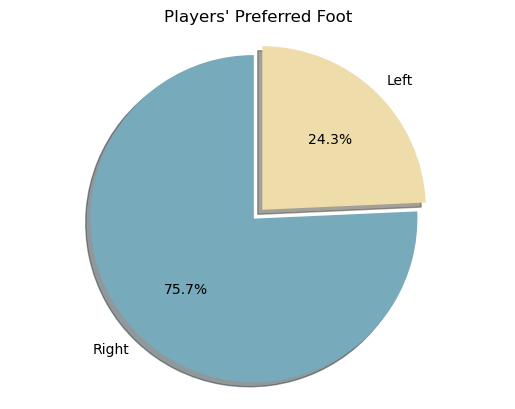

In [62]:
# Create a pie chart to show distribution of players' preferred foot
preferred_foot_counts = df_merged['preferred_foot'].value_counts()
colors = ['#7AB', '#EDA']
plt.figure()
plt.pie(preferred_foot_counts,labels=['Right', 'Left'], shadow=True, explode=[0, 0.075], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Players' Preferred Foot")
plt.axis('equal')
plt.show()

### Observations
>
>
> - The majority of players are right-footed, with 75.7% being right footed and 24.3% percent being left-footed.
>


### 2. Does right or left footedness have an impact on ball control?
>
> - Do left or right footed players tend to have better ball control?
>
> - Create a bar chart to see if there is an obvious difference in the mean ball control ratings of right-footed and left-footed players.
> 
>

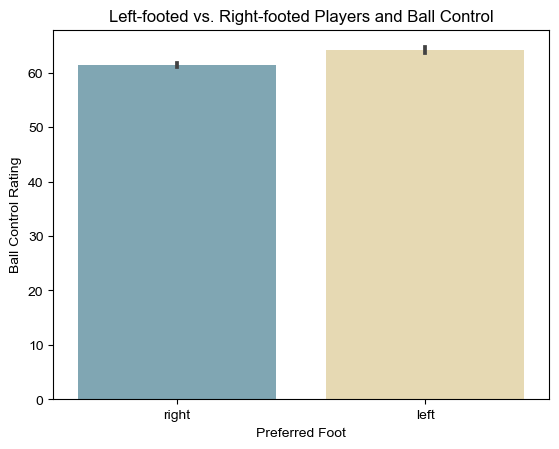

In [63]:
# Do right_footed or left_footed players have better ball control?
sns.barplot(data=df_merged, x='preferred_foot', y='ball_control', palette=['#7AB', '#EDA'])
sns.set(style="whitegrid")
plt.title('Left-footed vs. Right-footed Players and Ball Control')
plt.ylabel('Ball Control Rating')
plt.xlabel('Preferred Foot')
plt.show()

### Observations
>
> - On average, left footed players have marginally better ball control.

### 3. Does age have an impact on overall rating? If an influence does exist, is it the same for right-footed and left-footed players?
>
> - Create a lineplot so see if there is are obvious trends when considereing a player's age when compared against their overall rating. 
>
> - If a trend exists, is it the same for right-footed and left-footed players?

In [64]:
# Create a function that makes lineplots. Simply add the column names to compare as arguments. 
# The lineplots made with this function will all have the same style and appearance.
def lineplot(x, y): 
    sns.set(style='whitegrid')
    sns.lineplot(x=x, y=y, data=df_merged, hue='preferred_foot', palette=['#7AB', '#EDA'])
    x_label = x.replace('_', ' ').capitalize()
    y_label = y.replace('_', ' ').capitalize()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs. {y_label}')
    plt.legend(title='Preferred Foot')
    plt.show()

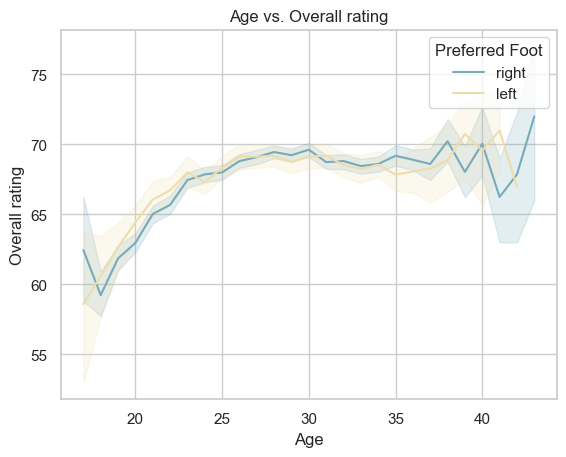

In [65]:
# Does age have an impact on overall rating? How is foot preference distributed?
lineplot('age', 'overall_rating')

### Observations
>
>
> - Players in their late twenties onward seem to have higher overall ratings than younger players. Perhaps years of experience plays a part in this trend, but further research would be necessary to say definitively.
>
> - There is no major difference between right-footed and left-footed players' overall rating when considered against their age, with both following quite closely the same general trend.

### 4. Are aggressive players more accurate with their penalty kicks? Is the correlation the same for left or right footed players?
>
> - Create a lineplot so see if there is are obvious trends when considereing a player's aggression rating compared against their accuracy when making penalty kicks. 
>
> - If a trend exists, is it the same for right-footed and left-footed players?

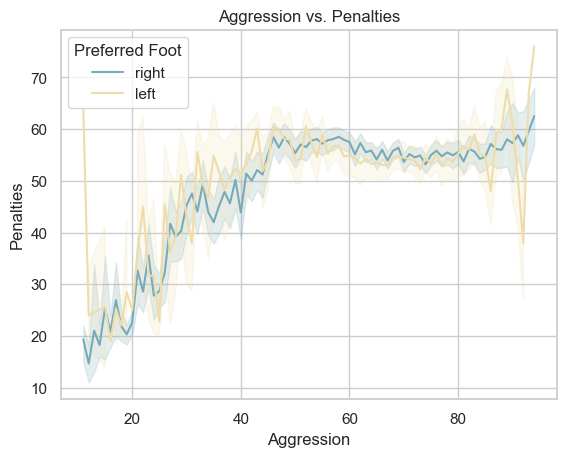

In [66]:
# Do more aggressive players have better penalty kick accuracy?
lineplot('aggression', 'penalties')

### Observations
>
>
> - As aggression ratings climb, so does penalty kick accuracy, until aggression ratings reach the mid 40s, where the penalty kick accuracy curve remains fairly flat.
>
> - There is no major difference between right-footed and left-footed players, both following quite closely the same general trend.

### 5. Is there a correlation between a player's weight and agility?
>
> - Create a lineplot to see if there is a noticeable trend in a players' agility ratings as weight increases.
>
> - Is the trend consistent between right-footed and left-footed players, if it exists?
>
>



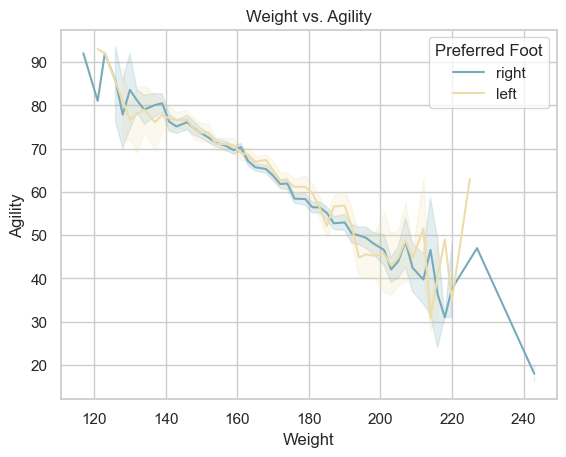

In [67]:
lineplot('weight', 'agility')

### Observations
>
>
> - There seems to be a negative correlation bewteen weight and agility, with lighter players having a higher agility rating than heavier players
>
> - Like the graphs above, right-footed and left-footed players follow the trend quite closely

### 6. Is there a relationship between strength and shot power?
>
> - Do players with higher strength ratings have higher shot power ratings?
>
> - Is there a noticeable difference between right-footed and left-footed players?


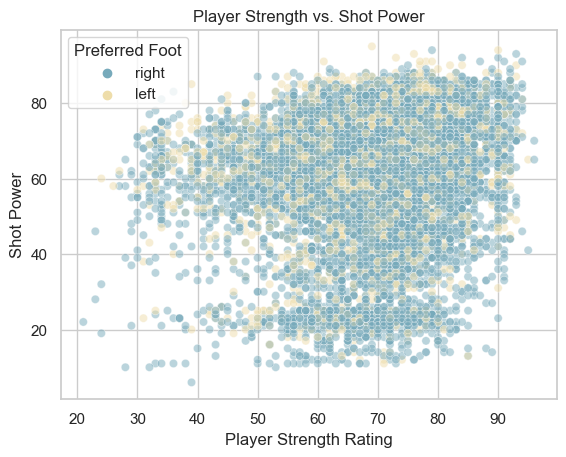

In [68]:
# Does a higher 'Strength' rating relate to higher 'shot power'?
sns.set(style='whitegrid')
sns.scatterplot(x='strength', y='shot_power', hue='preferred_foot', alpha=0.5, palette=['#7AB', '#EDA'], data=df_merged)
plt.xlabel('Player Strength Rating')
plt.ylabel('Shot Power')
plt.title('Player Strength vs. Shot Power')
plt.legend(title='Preferred Foot')
plt.show()

### Observations
>
> - No clear correlation is apparent between the strength rating and shot power. The scatterplot displays a relatively uniform distribution across the entire graph.
>
> - Once more, there is no significant distinction between right-footed and left-footed players, as both are uniformly spread across the graph.

### 7. How does sprint speed relate to stamina?
>
> - Create a lineplot that show any correlations between sprint speed and stamina. Do faster players tire more quickly?
>
> - Is the trend consistent between right-footed and left-footed players, if it exists?


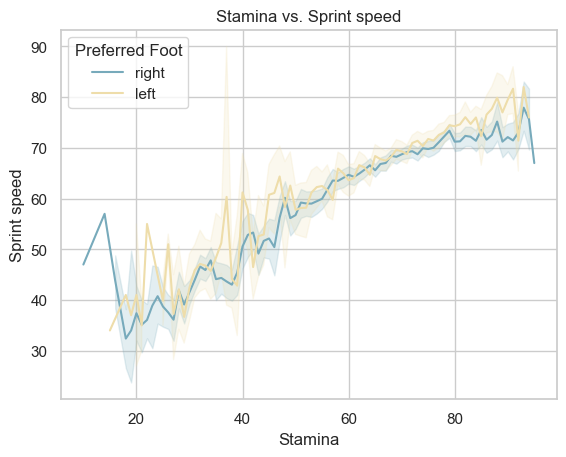

In [69]:
lineplot('stamina', 'sprint_speed')

### Observations
>
> - There is a positive correlation between stamina and sprint speed. The graph shows that players with higher stamina ratings also tend to have higher sprint speed ratings.
>
> - Right-footed and left-footed players follow the trend line with no obvious differences.

### 8. What is the distribution of defensive work rates among right-footed and left-footed players?
>
> - Create a bar chart that shows the distribution of defensive work rates among all players. Include separate measurements for right-footed and left footed players.
>
> - Is there an obvious difference in the distribution between righ-footed and left footed players?


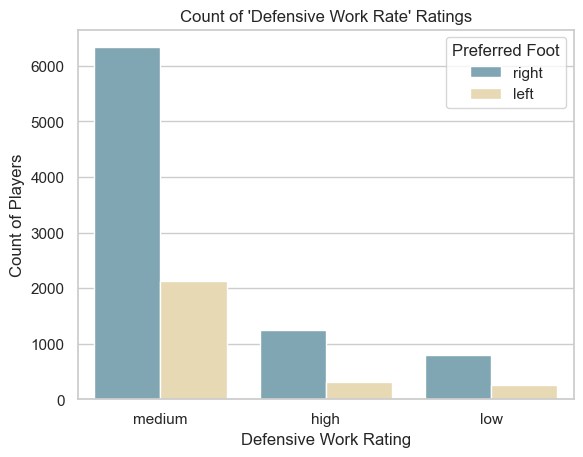

In [70]:
 # Create a countplot to show distribution of 'defensive_work_rate' for right and left footed players
sns.countplot(data=df_merged, x='defensive_work_rate', hue='preferred_foot', palette=['#7AB', '#EDA'])
sns.set(style='whitegrid')
plt.title("Count of 'Defensive Work Rate' Ratings")
plt.ylabel('Count of Players')
plt.xlabel('Defensive Work Rating')
plt.legend(title='Preferred Foot')
plt.show()

### Observations
>
> - The majority of players (by a wide margin) have a 'medium' defensive work rate. The next most common work rate is 'high', and slightly fewer have a 'low' rating. 
>
> - The distribution is consistent among right-footed and left-footed players.


### 9. What is the distribution of attacking work rates among right-footed and left-footed players?
>
> - Create a bar chart illustrating the breakdown of attacking work rates among all players, with separate measurements for right-footed and left-footed players.
>
> - Is the distribution of right-footed and left-footed players consistent?

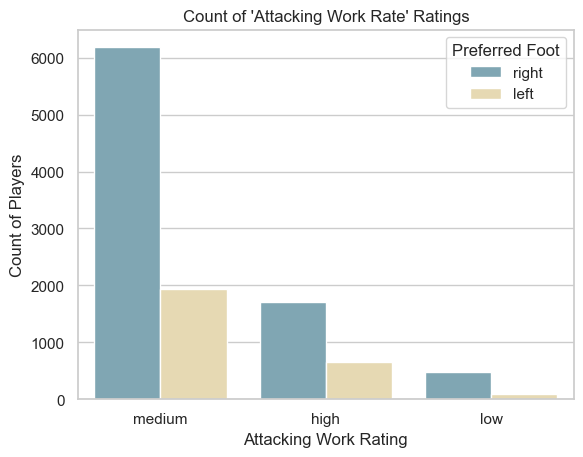

In [71]:
 # Create a countplot to show distribution of 'attacking_work_rate' for right and left footed players
sns.countplot(data=df_merged, x='attacking_work_rate',  hue='preferred_foot', palette=['#7AB', '#EDA'])
sns.set(style='whitegrid')
plt.title("Count of 'Attacking Work Rate' Ratings")
plt.ylabel('Count of Players')
plt.xlabel('Attacking Work Rating')
plt.legend(title='Preferred Foot')
plt.show()

### Observations
>
> - Like the graph above, the 'medium' attacking work rate is predominant among players, with 'high' being the next most frequent, with 'low' much less common.
>
> - Like all the other visualizations we have explored thus far, distribution remains very consistent among right-footed and left-footed players.

In [72]:
# Close the cursor
cursor.close()

In [73]:
# Close the connection to the database file
conn.close()

<a id='conclusions'></a>
## Conclusions
### Findings
> - Overall, right-footed and left-footed players are are closely matched and follow the same trend lines.
> - About 75% of players are right-footed.
> - On average, left-footed players have slightly getter ball control.
> - After the age of 25, age has little effect on a player's overall rating.
> - Penalty kick accuracy ratings climb with aggression ratings, but plateau once aggression ratings reach the mid 40s.
> - Lighter players tend to be more agile.
> - There is no correlation between strength and shot power.
> - Players with greater stamina tend to have faster sprint speed.
> - Most players have a 'medium' defensive work rating, and the distribution among right footed players roughly the same among left-footed players.
> - The same is true for attacking work rates.
### Limitations
> While the data used provided a good starting point, the analysis faced notable limitations. Missing data required imputations, introducing some uncertainty. Furthermore, the dataset's age, being a from 2008-2016, may impact its current relevance, prompting careful interpretation of the results. Combining the data used in this project along with more current data (and data from before 2008 as well) could provide fodder for some interesting insights.